<a href="https://colab.research.google.com/github/Priyam-28/NerdyNeurons/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#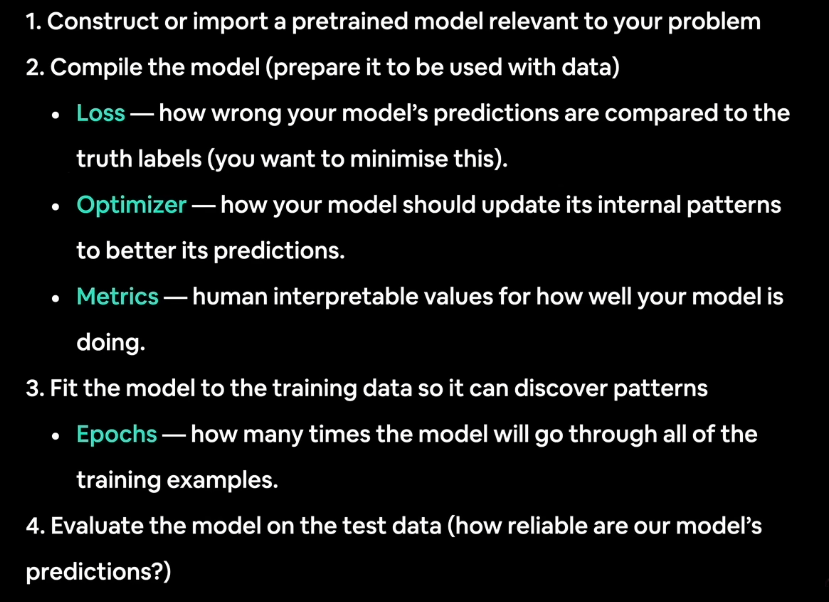Neural Network Regression with TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

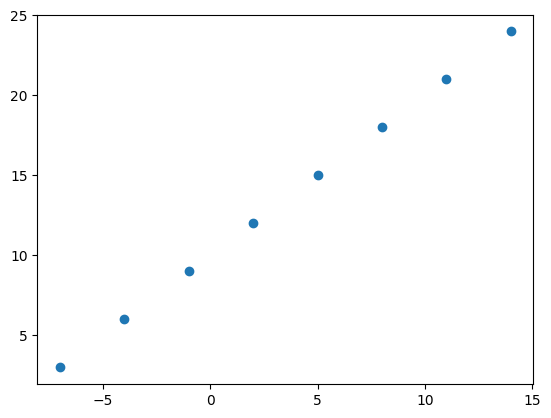

In [4]:
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [5]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

##Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1.  **Creating a model** - piece together the layers of a neural network (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2.  .**Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [6]:
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
tf.random.set_seed(42)
# Creating A Model using Sequential APi
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # 1 because 1 output for one output
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 524ms/step - loss: 13.2740 - mae: 13.2740
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 13.1416 - mae: 13.1416
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 13.0091 - mae: 13.0091
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 12.8766 - mae: 12.8766
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.7441 - mae: 12.7441


In [8]:
y_predict=model.predict([17.0])
y_predict

1/1 [==============================] - 0s 122ms/step


array([[4.122468]], dtype=float32)

## Improving the Model

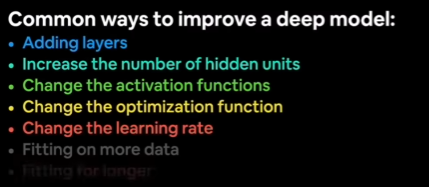

In [9]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.6280 - mae: 14.6280
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.8015 - mae: 13.8015
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9977 - mae: 12.9977
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2120 - mae: 12.2120
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4277 - mae: 11.4277
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6428 - mae: 10.6428
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9510 - mae: 9.9510
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3407 - mae: 9.3407
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7114 - mae: 8.7114
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0581 - mae: 8.0581
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [10]:
y_predict2=model2.predict([17.0])
y_predict2

1/1 [==============================] - 0s 142ms/step


array([[27.275137]], dtype=float32)

##Model Evaluation

In [12]:
X=np.arange(-100,100,4)
y=np.arange(-90,110,4)
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

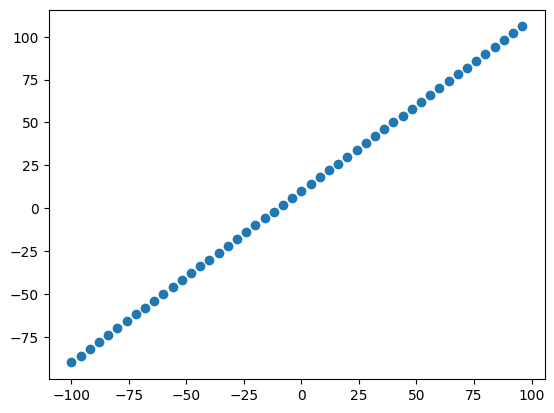

In [13]:
plt.scatter(X,y)

### Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [14]:
X_train=X[:40]
y_train=y[:40]
X_test=X[40:]
y_test=y[40:]

len(X_train),len(X_test)

(40, 10)

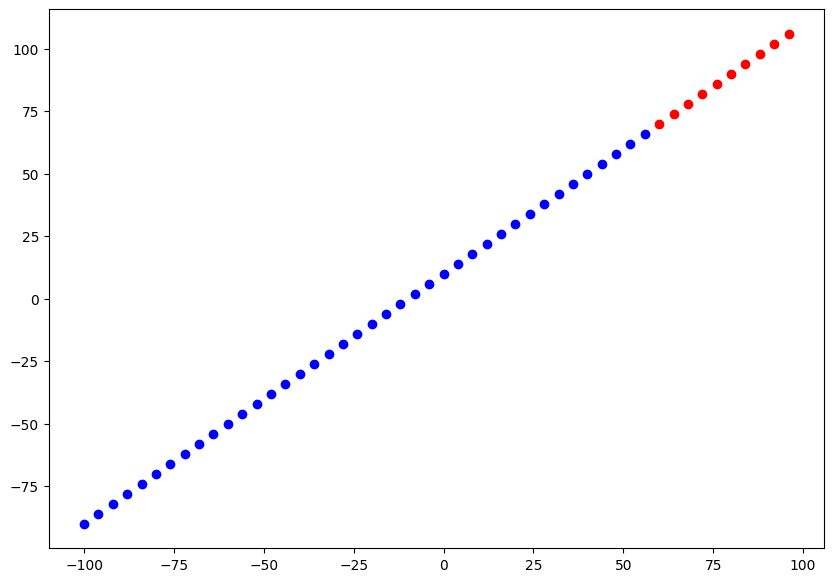

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,color="blue")
plt.scatter(X_test,y_test,color="red")


In [22]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Model Summary
**Total params** - total number of parameters in the model.

Trainable parameters  - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters  - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).